In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from scipy import stats
import math
import sklearn.metrics
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92400
1,18,male,33.77,1,no,southeast,1725.55230
2,28,male,33.00,3,no,southeast,4449.46200
3,33,male,22.71,0,no,northwest,21984.47061
4,32,male,28.88,0,no,northwest,3866.85520


In [4]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [5]:
# We need to use a package from sklearn
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder().fit_transform(df['region'])
le

array([3, 2, 2, ..., 2, 3, 1])

In [6]:
df.loc[:,'region_code'] = le

In [7]:
le2 = LabelEncoder().fit_transform(df['smoker'])
le2

array([1, 0, 0, ..., 0, 0, 1])

In [8]:
df.loc[:,'smoker_code'] = le2

In [9]:
le3 = LabelEncoder().fit_transform(df['sex'])
le3

array([0, 1, 1, ..., 0, 0, 0])

In [10]:
df.loc[:,'sex_code'] = le3

In [11]:
df.head()

,age,sex,bmi,children,smoker,region,charges,region_code,smoker_code,sex_code
0,19,female,27.90,0,yes,southwest,16884.92400,3,1,0
1,18,male,33.77,1,no,southeast,1725.55230,2,0,1
2,28,male,33.00,3,no,southeast,4449.46200,2,0,1
3,33,male,22.71,0,no,northwest,21984.47061,1,0,1
4,32,male,28.88,0,no,northwest,3866.85520,1,0,1


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          1338 non-null   int64  
 1   sex          1338 non-null   object 
 2   bmi          1338 non-null   float64
 3   children     1338 non-null   int64  
 4   smoker       1338 non-null   object 
 5   region       1338 non-null   object 
 6   charges      1338 non-null   float64
 7   region_code  1338 non-null   int64  
 8   smoker_code  1338 non-null   int64  
 9   sex_code     1338 non-null   int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 104.7+ KB


IS GENDER PREDICTIVE (FOR ENTIRE DATA SET, SMOKERS AND NON)

In [13]:
#split dataset in features and target variable
df_cols = ['age','bmi', 'children', 'smoker_code', 'region_code', 'charges']
X = df[df_cols] # Features
y = df.sex_code # Target variable

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [15]:
# import the class using from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

In [16]:
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [17]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[114,  39],
       [131,  51]])

Text(0.5, 257.44, 'Predicted label')

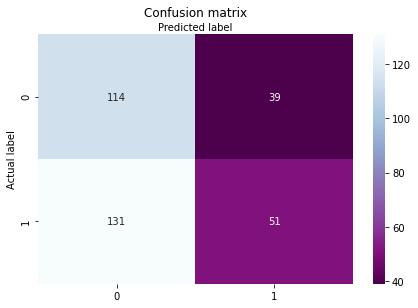

In [46]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="BuPu_r" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [47]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.4925373134328358
Precision: 0.5666666666666667
Recall: 0.2802197802197802


PREDICT USING REGION

In [31]:
df['region_code'].value_counts()

2    364
3    325
1    325
0    324
Name: region_code, dtype: int64

In [36]:
#split dataset in features and target variable
df2_cols = ['age','bmi', 'children', 'smoker_code', 'sex_code' ,'charges']
X2 = df[df2_cols] # Features
y2 = df.region_code # Target variable

In [37]:
X2_train,X2_test,y2_train,y2_test=train_test_split(X2,y2,test_size=0.25,random_state=0)

In [38]:
logreg2 = LogisticRegression()

# fit the model with data
logreg2.fit(X2_train,y2_train)

#
y2_pred=logreg2.predict(X2_test)

In [39]:
y2_pred

array([3, 3, 2, 3, 1, 3, 2, 3, 2, 2, 3, 3, 3, 3, 2, 3, 1, 2, 3, 2, 0, 3,
       0, 0, 2, 2, 3, 2, 3, 3, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2,
       2, 2, 0, 3, 3, 0, 2, 2, 0, 2, 2, 2, 2, 3, 3, 1, 2, 0, 3, 3, 3, 3,
       2, 2, 2, 3, 1, 1, 2, 3, 1, 1, 3, 3, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2,
       1, 2, 2, 3, 2, 3, 2, 2, 0, 2, 2, 3, 2, 2, 2, 2, 2, 3, 1, 2, 3, 0,
       1, 2, 3, 2, 2, 3, 2, 3, 3, 3, 2, 1, 3, 2, 3, 3, 0, 0, 2, 2, 3, 2,
       3, 1, 2, 2, 0, 1, 0, 2, 2, 3, 3, 3, 3, 3, 2, 2, 2, 0, 3, 2, 3, 2,
       2, 3, 2, 2, 3, 3, 2, 3, 0, 3, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2,
       3, 3, 0, 2, 3, 2, 3, 2, 2, 0, 2, 2, 3, 3, 2, 2, 3, 0, 2, 2, 3, 2,
       2, 2, 3, 0, 3, 2, 2, 2, 2, 3, 2, 2, 3, 1, 2, 2, 3, 2, 3, 3, 1, 1,
       2, 3, 3, 2, 3, 3, 3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 3, 2, 3, 1, 3, 2,
       2, 3, 3, 3, 2, 2, 2, 3, 2, 0, 2, 2, 2, 2, 3, 2, 2, 2, 1, 0, 0, 1,
       3, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 0, 3, 2, 1, 1, 2, 1, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 3, 2, 3, 3, 2, 3, 2, 3, 2,

In [40]:
cnf_matrix2 = metrics.confusion_matrix(y2_test, y2_pred)
cnf_matrix2

array([[ 8,  6, 49, 33],
       [ 5,  8, 44, 30],
       [ 8,  6, 52, 22],
       [ 5,  5, 30, 24]])

Text(0.5, 257.44, 'Predicted label')

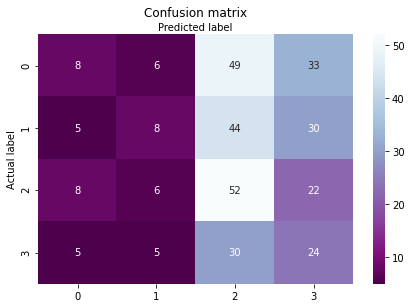

In [48]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix2), annot=True, cmap='BuPu_r' ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [45]:
print("Accuracy:",metrics.accuracy_score(y2_test, y2_pred))
#print("Precision:",metrics.precision_score(y2_test, y2_pred))
#print("Recall:",metrics.recall_score(y2_test, y2_pred))

Accuracy: 0.2746268656716418
